In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Face_mask_project


data  face_mask.yaml  notebooks  results  runs	yolo11n.pt  yolov8s.pt


**Model selection**

YOLOv8 is one of the architectures for object detection.

Use YOLOv8s to prioritize speed and save VRAM.

Use transfer learning that has been pre-trained on the COCO dataset.

YOLO has its own optimizer and learning rate to find loss faster.

YOLO allows for fully automatic augmentation during training.

Resize images to 620x620px to avoid excessive distortion compared to the original image while still learning fine details effectively.

The model will retrieve data from the face_mask.yaml file, train for 300 epochs, and output charts showing loss, precision, recall, and other metrics.

YOLO transfered weights from 349/355 layers.

In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.5 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolov8s.pt")

model.train(
    data="/content/drive/MyDrive/Face_mask_project/face_mask.yaml",
    epochs=300,
    batch=16,
    imgsz=620,
    workers=2,
    augment=True,
    project="/content/drive/MyDrive/Face_mask_project/runs",
    name="train_yolov8s"
)

Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Face_mask_project/face_mask.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_yolov8s3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100,

Showing: results.png


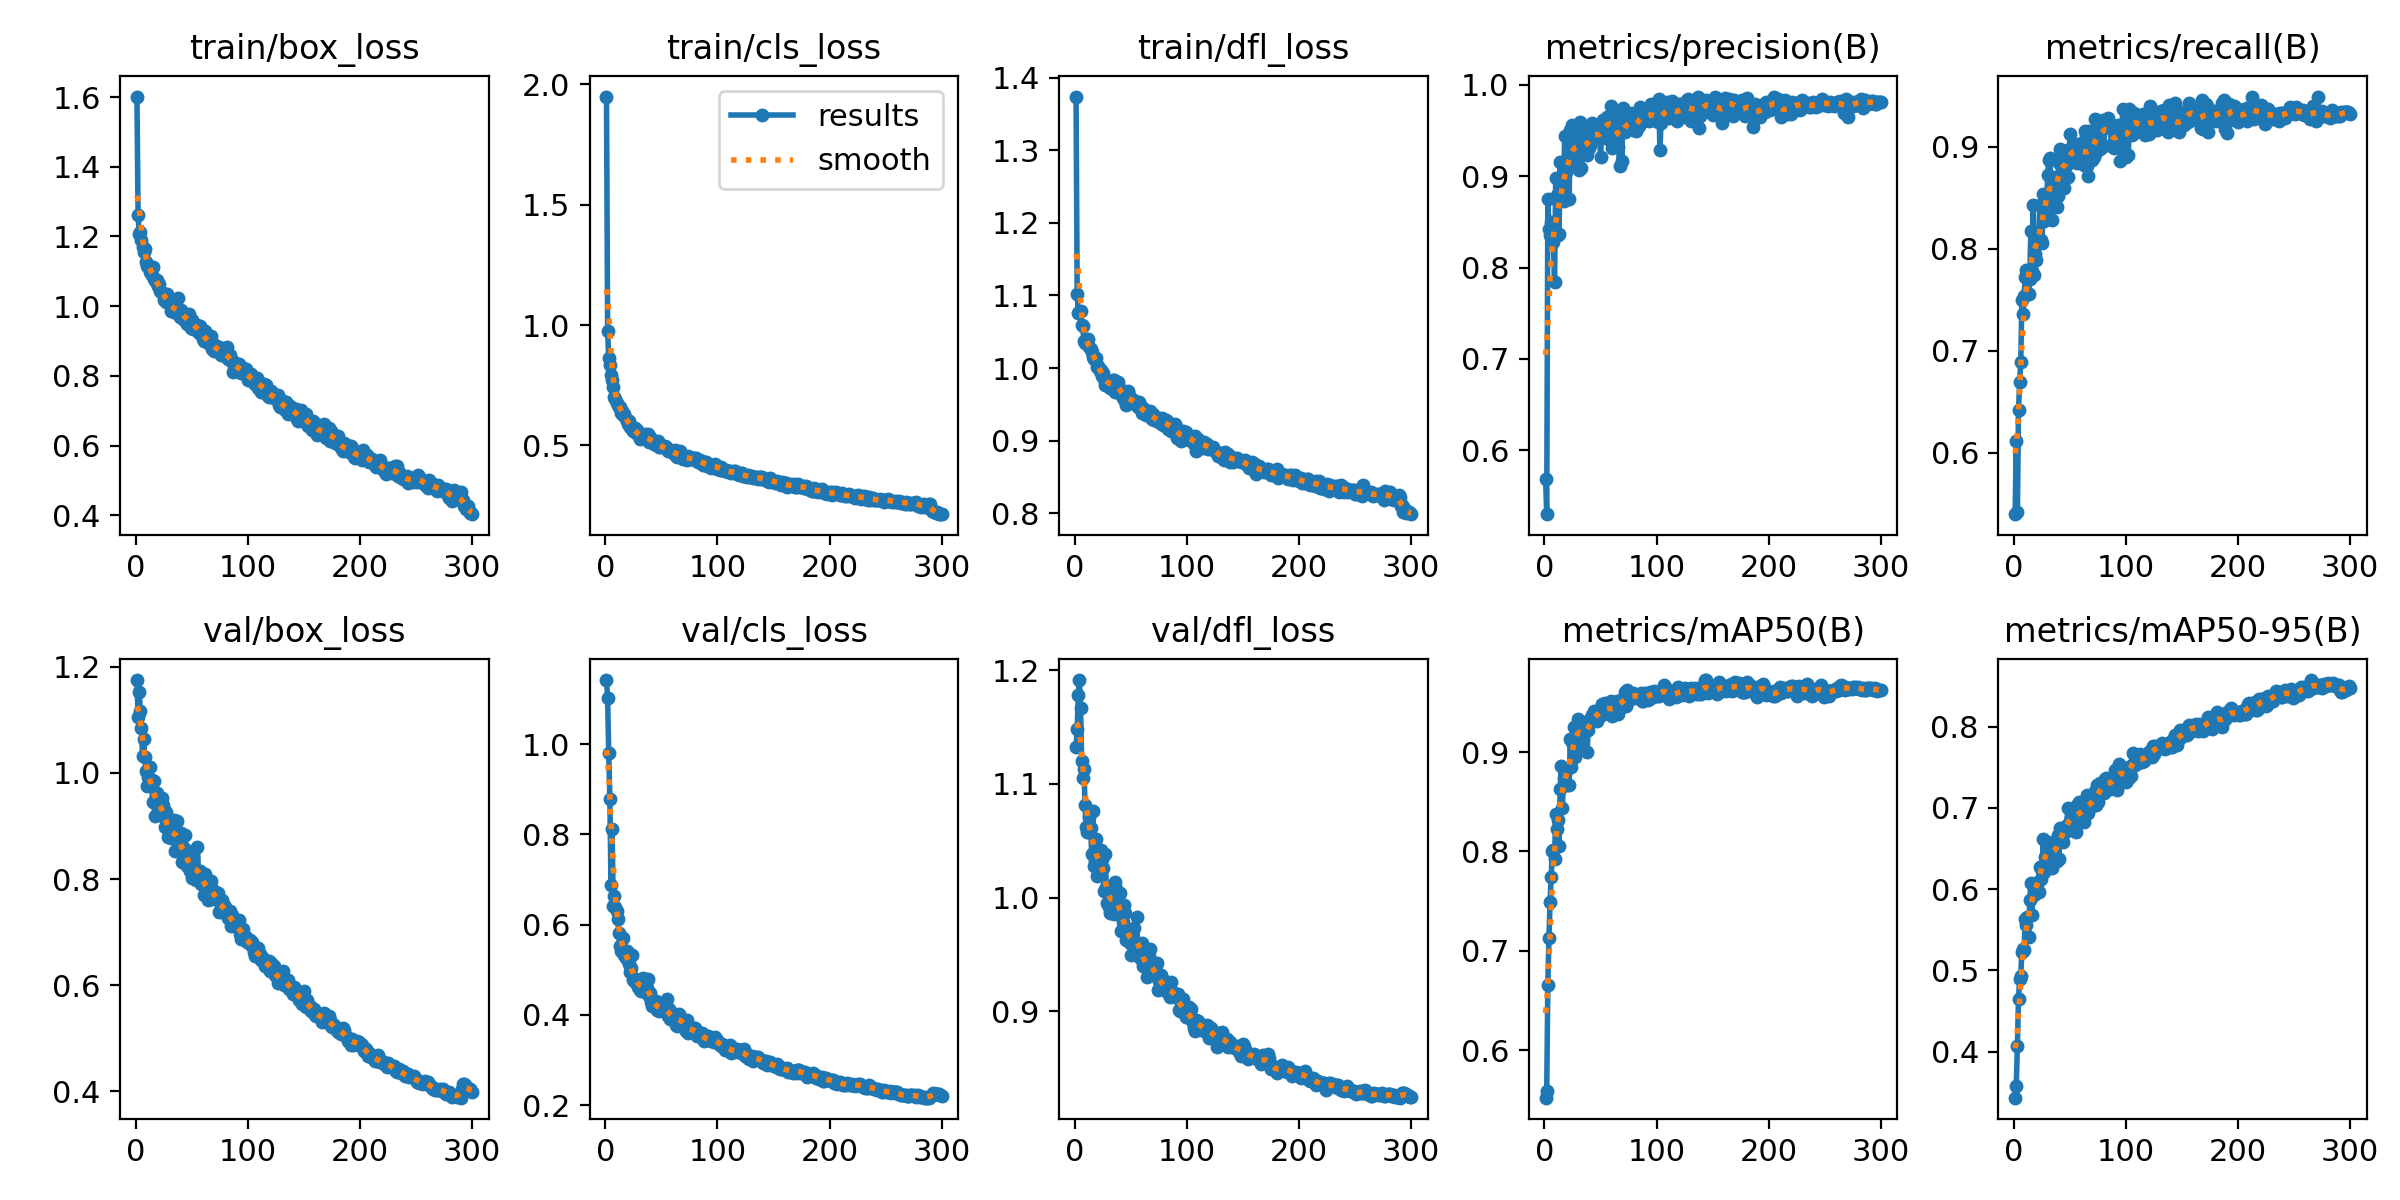

In [7]:
import os
from IPython.display import Image, display

RESULT_DIR = "/content/drive/MyDrive/Face_mask_project/runs/train_yolov8s"

datas_to_show = [
    "results.png"
]

for img_name in datas_to_show:
    img_path = os.path.join(RESULT_DIR, img_name)
    if os.path.exists(img_path):
        print(f"Showing: {img_name}")
        display(Image(filename=img_path))
    else:
        print(f"Not found: {img_path}")


**Training results**

The train/box_loss, train/cls_loss, and train/dfl_loss curves all decrease sharply and stabilize. This indicates that the model is learning very effectively from the training data. The val/box_loss, val/cls_loss, and val/dfl_loss curves decrease in parallel with the training loss curves. The model is not overfitting.

metrics/precision(B), metrics/recall(B), and metrics/mAP50(B) have plateaued at high levels, indicating the model has high accuracy.

metrics/mAP50(B) has also achieved a very high value, though not yet plateaued, but it is already a very good indicator that the model is performing well.

The best model achieved (on val data):

Precision: 0.981
Recall: 929
mAP50: 0.96
mAP50-95: 0.874
The high metrics indicate that the model has high accuracy, with very low error and omission rates.


In [ ]:
save_dir = "/content/drive/MyDrive/Face_mask_project/results/val_check"
os.makedirs(save_dir, exist_ok=True)

In [6]:
model = YOLO("/content/drive/MyDrive/Face_mask_project/runs/train_yolov8s/weights/best.pt")
model.val(
    conf= 0.5,
    save=True,
    project="/content/drive/MyDrive/Face_mask_project/results",
    name="val_check",
    exist_ok=True
)
results = model.predict(source="/content/drive/MyDrive/Face_mask_project/data/val/images")

Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 1.2±2.0 ms, read: 95.3±74.3 MB/s, size: 459.9 KB)
val: Scanning /content/drive/MyDrive/Face_mask_project/data/val/labels.cache... 310 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 310/310 463.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 20/20 2.4it/s 8.4s
                   all        310       1481      0.981      0.929       0.96      0.874
             with_mask        280       1197      0.983      0.982      0.989      0.909
          without_mask        111        241      0.959      0.967      0.973      0.892
 mask_weared_incorrect         33         43          1      0.837      0.919      0.821
Speed: 2.7ms preprocess, 7.5ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to /content/dr

Showing: BoxF1_curve.png


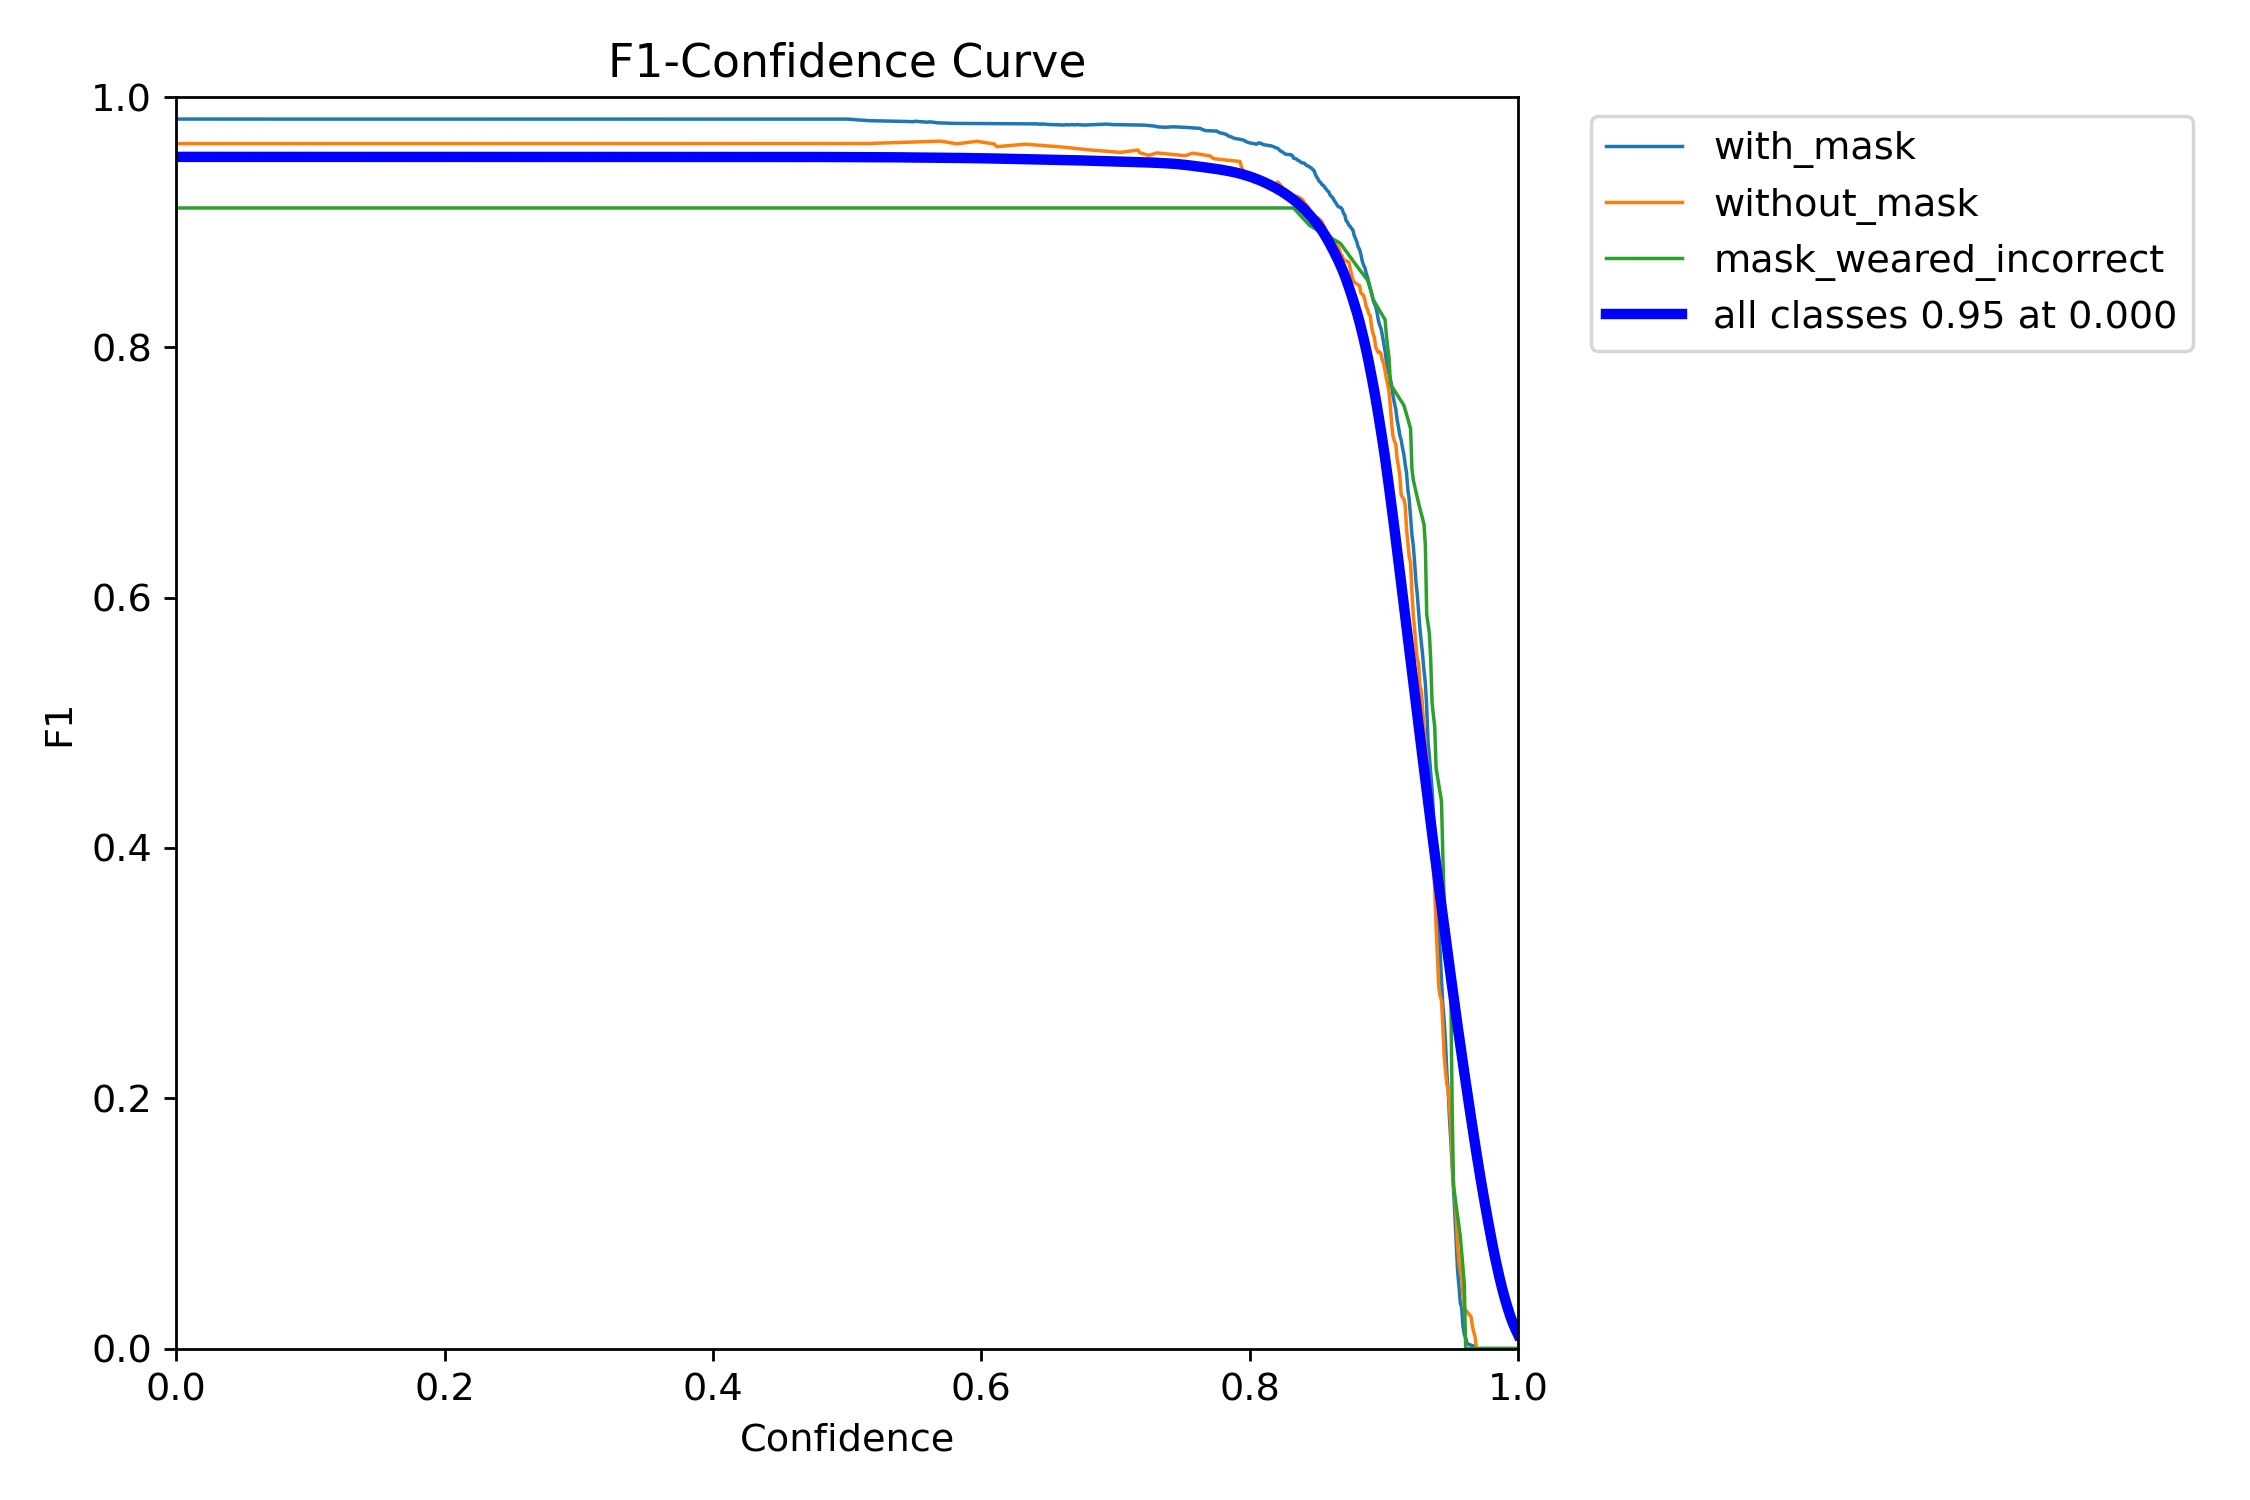

Showing: BoxPR_curve.png


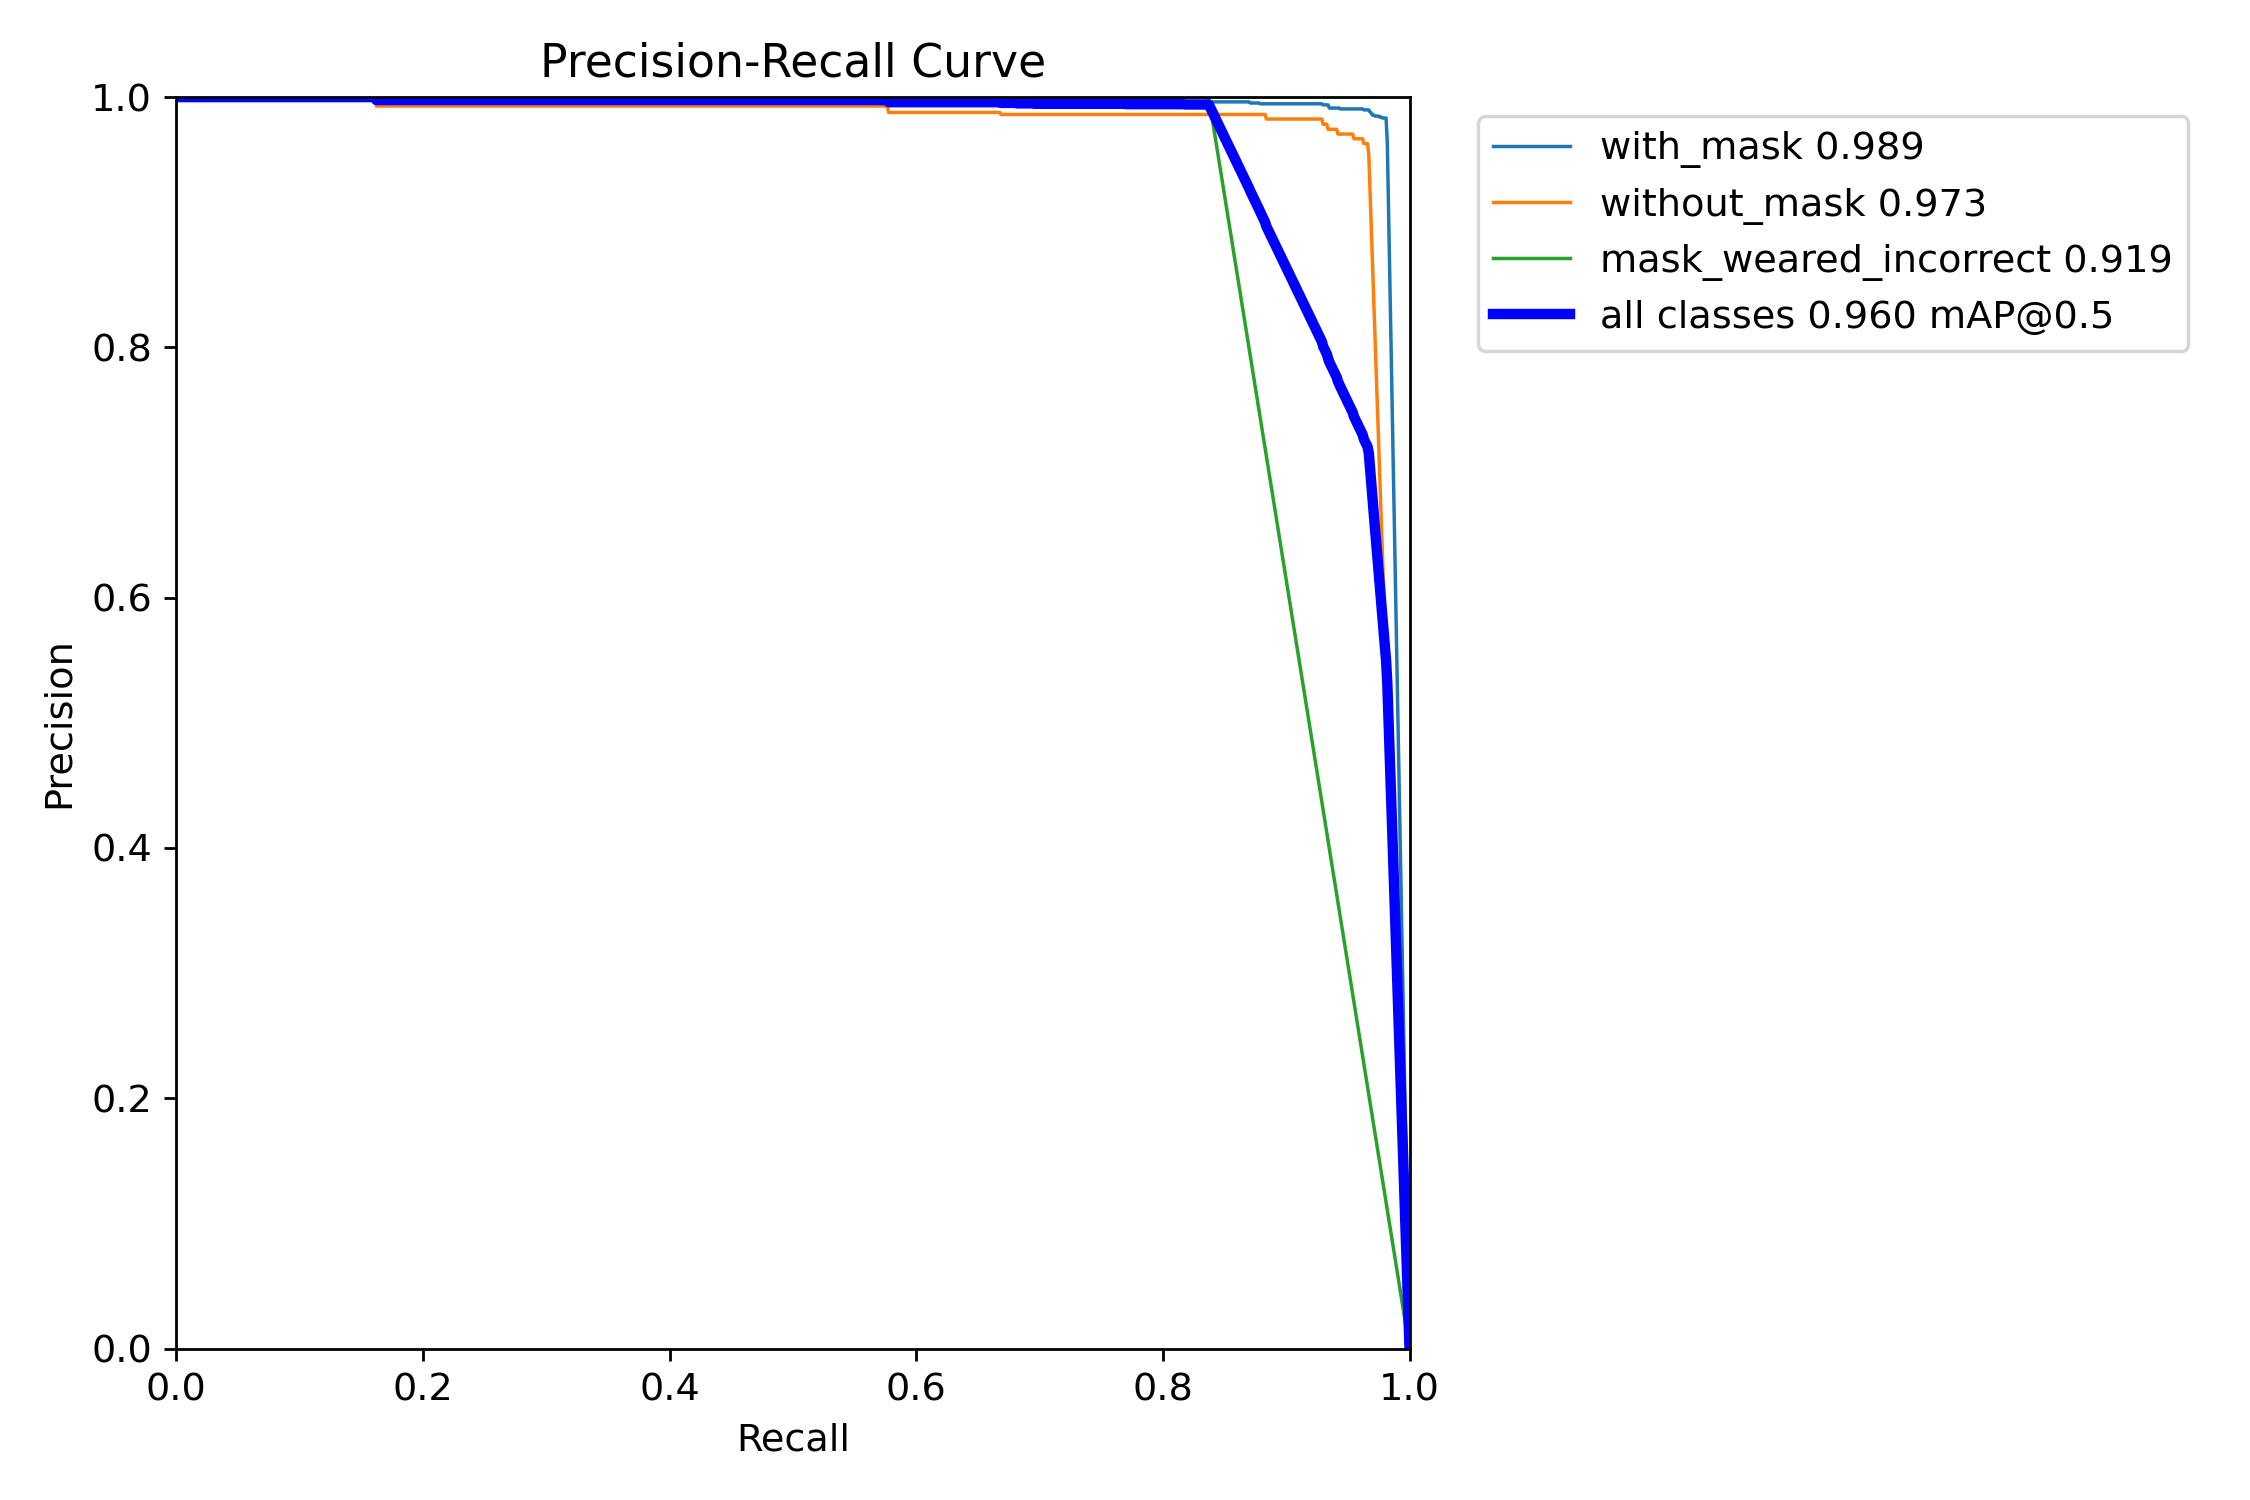

Showing: BoxP_curve.png


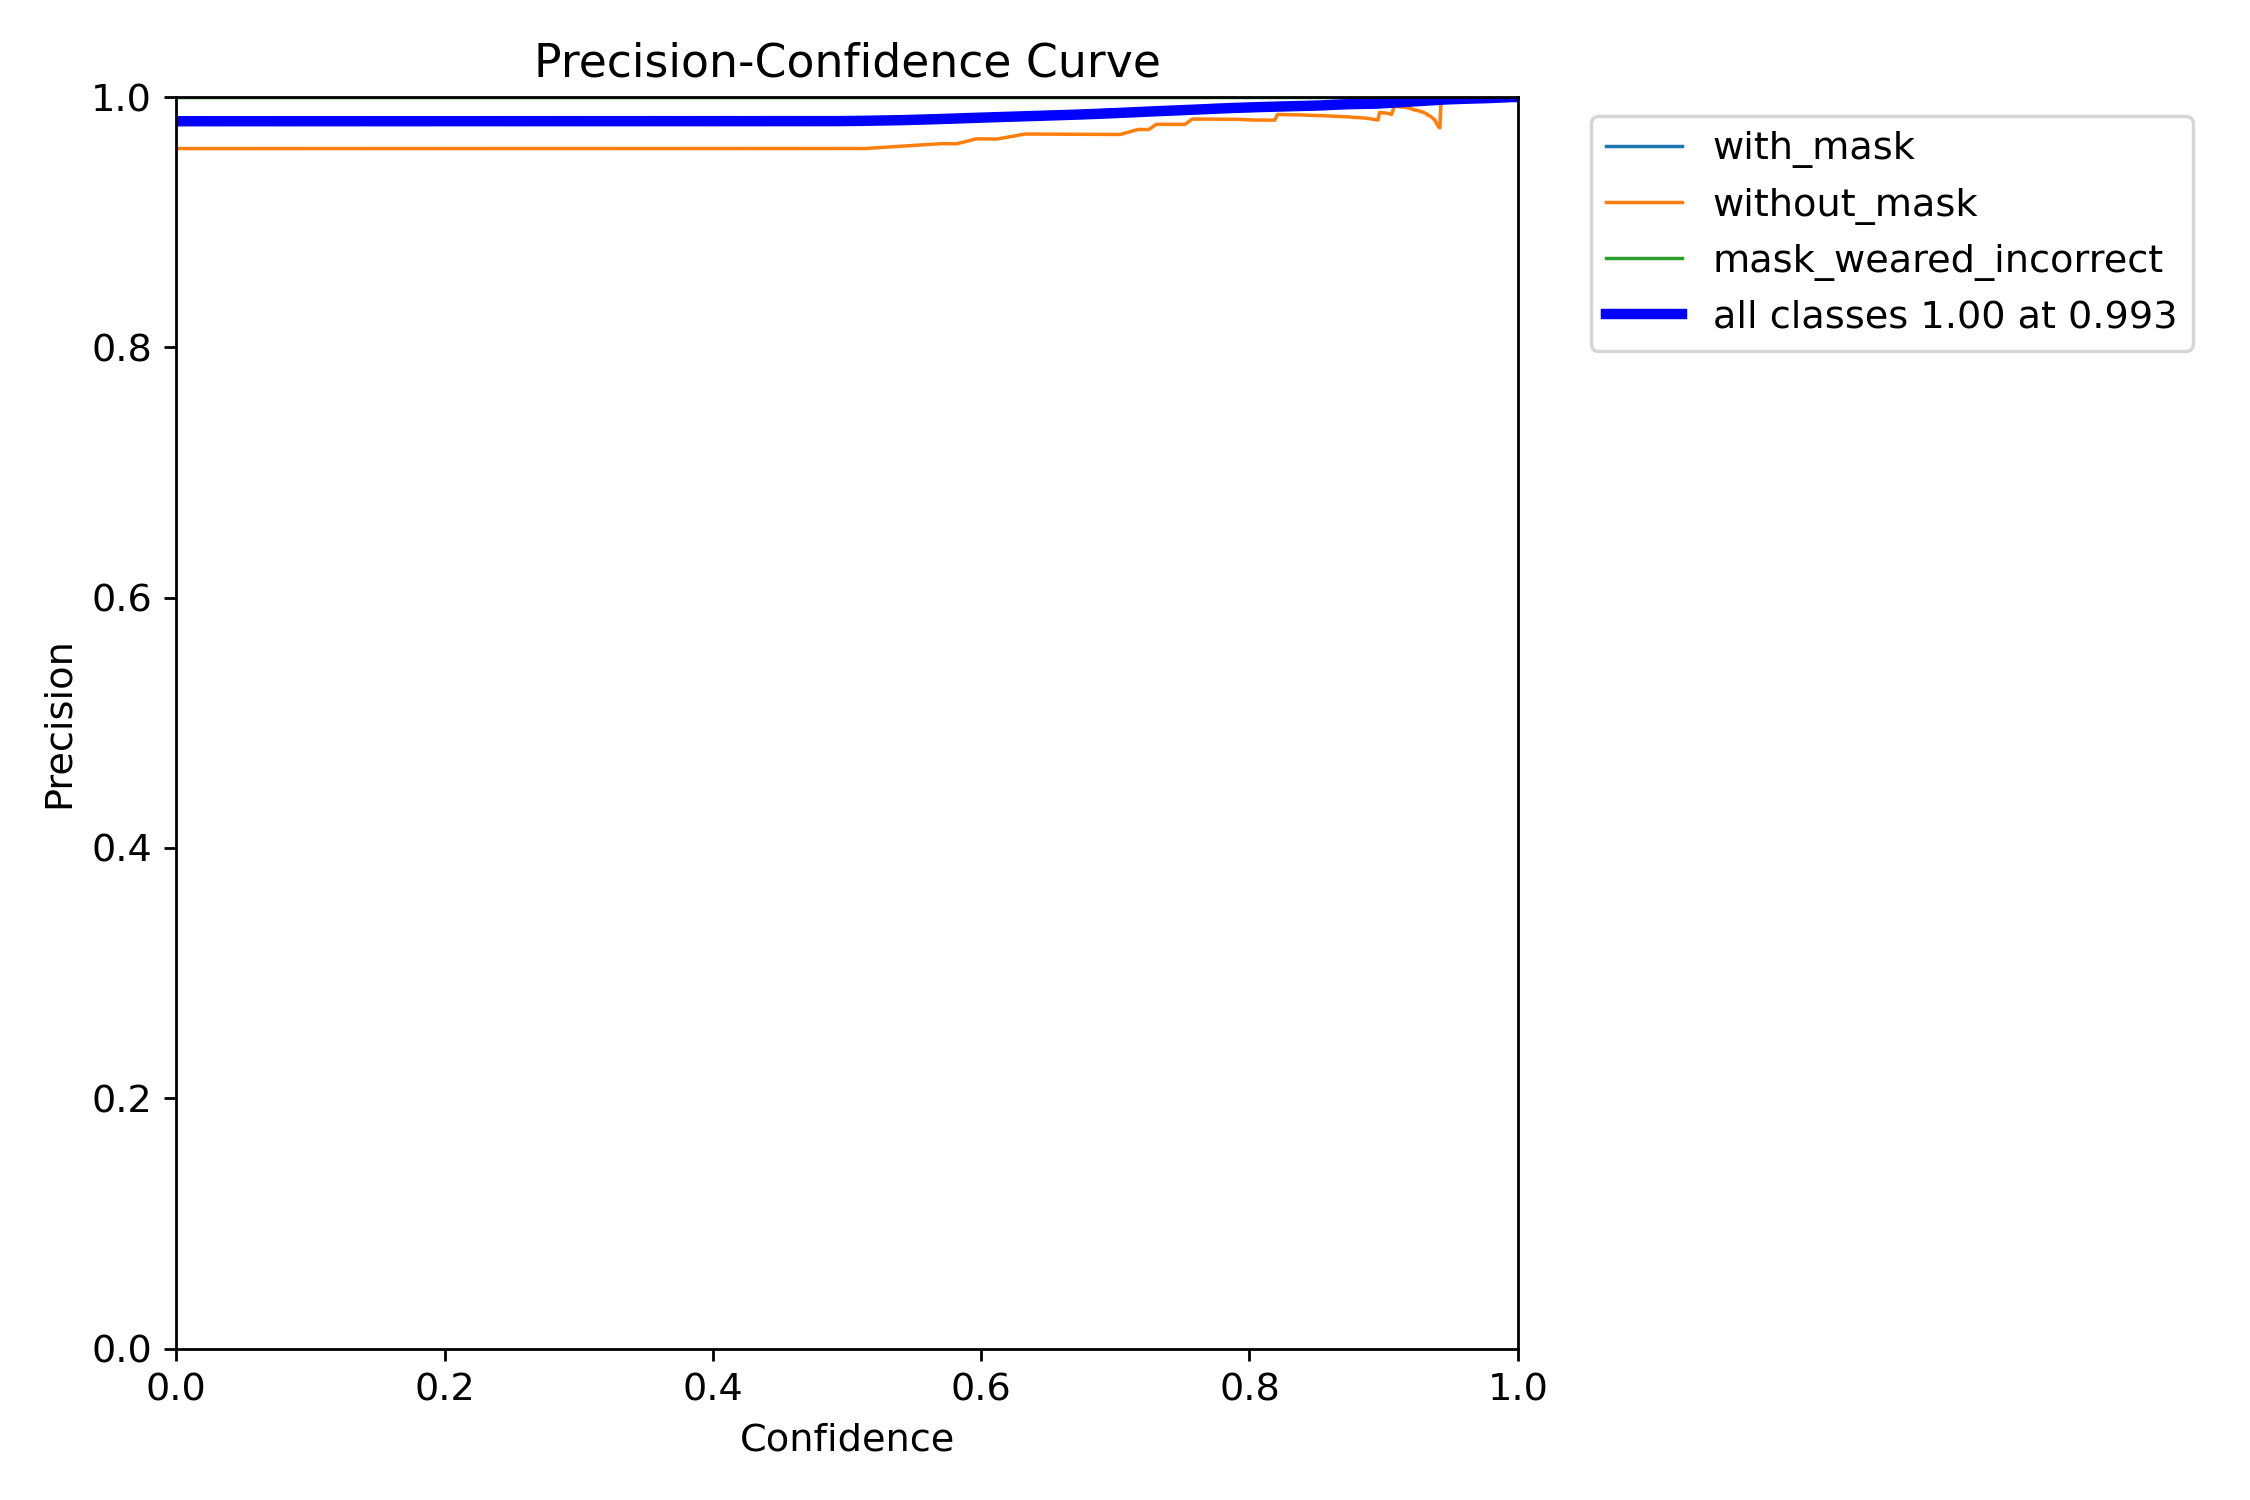

Showing: BoxR_curve.png


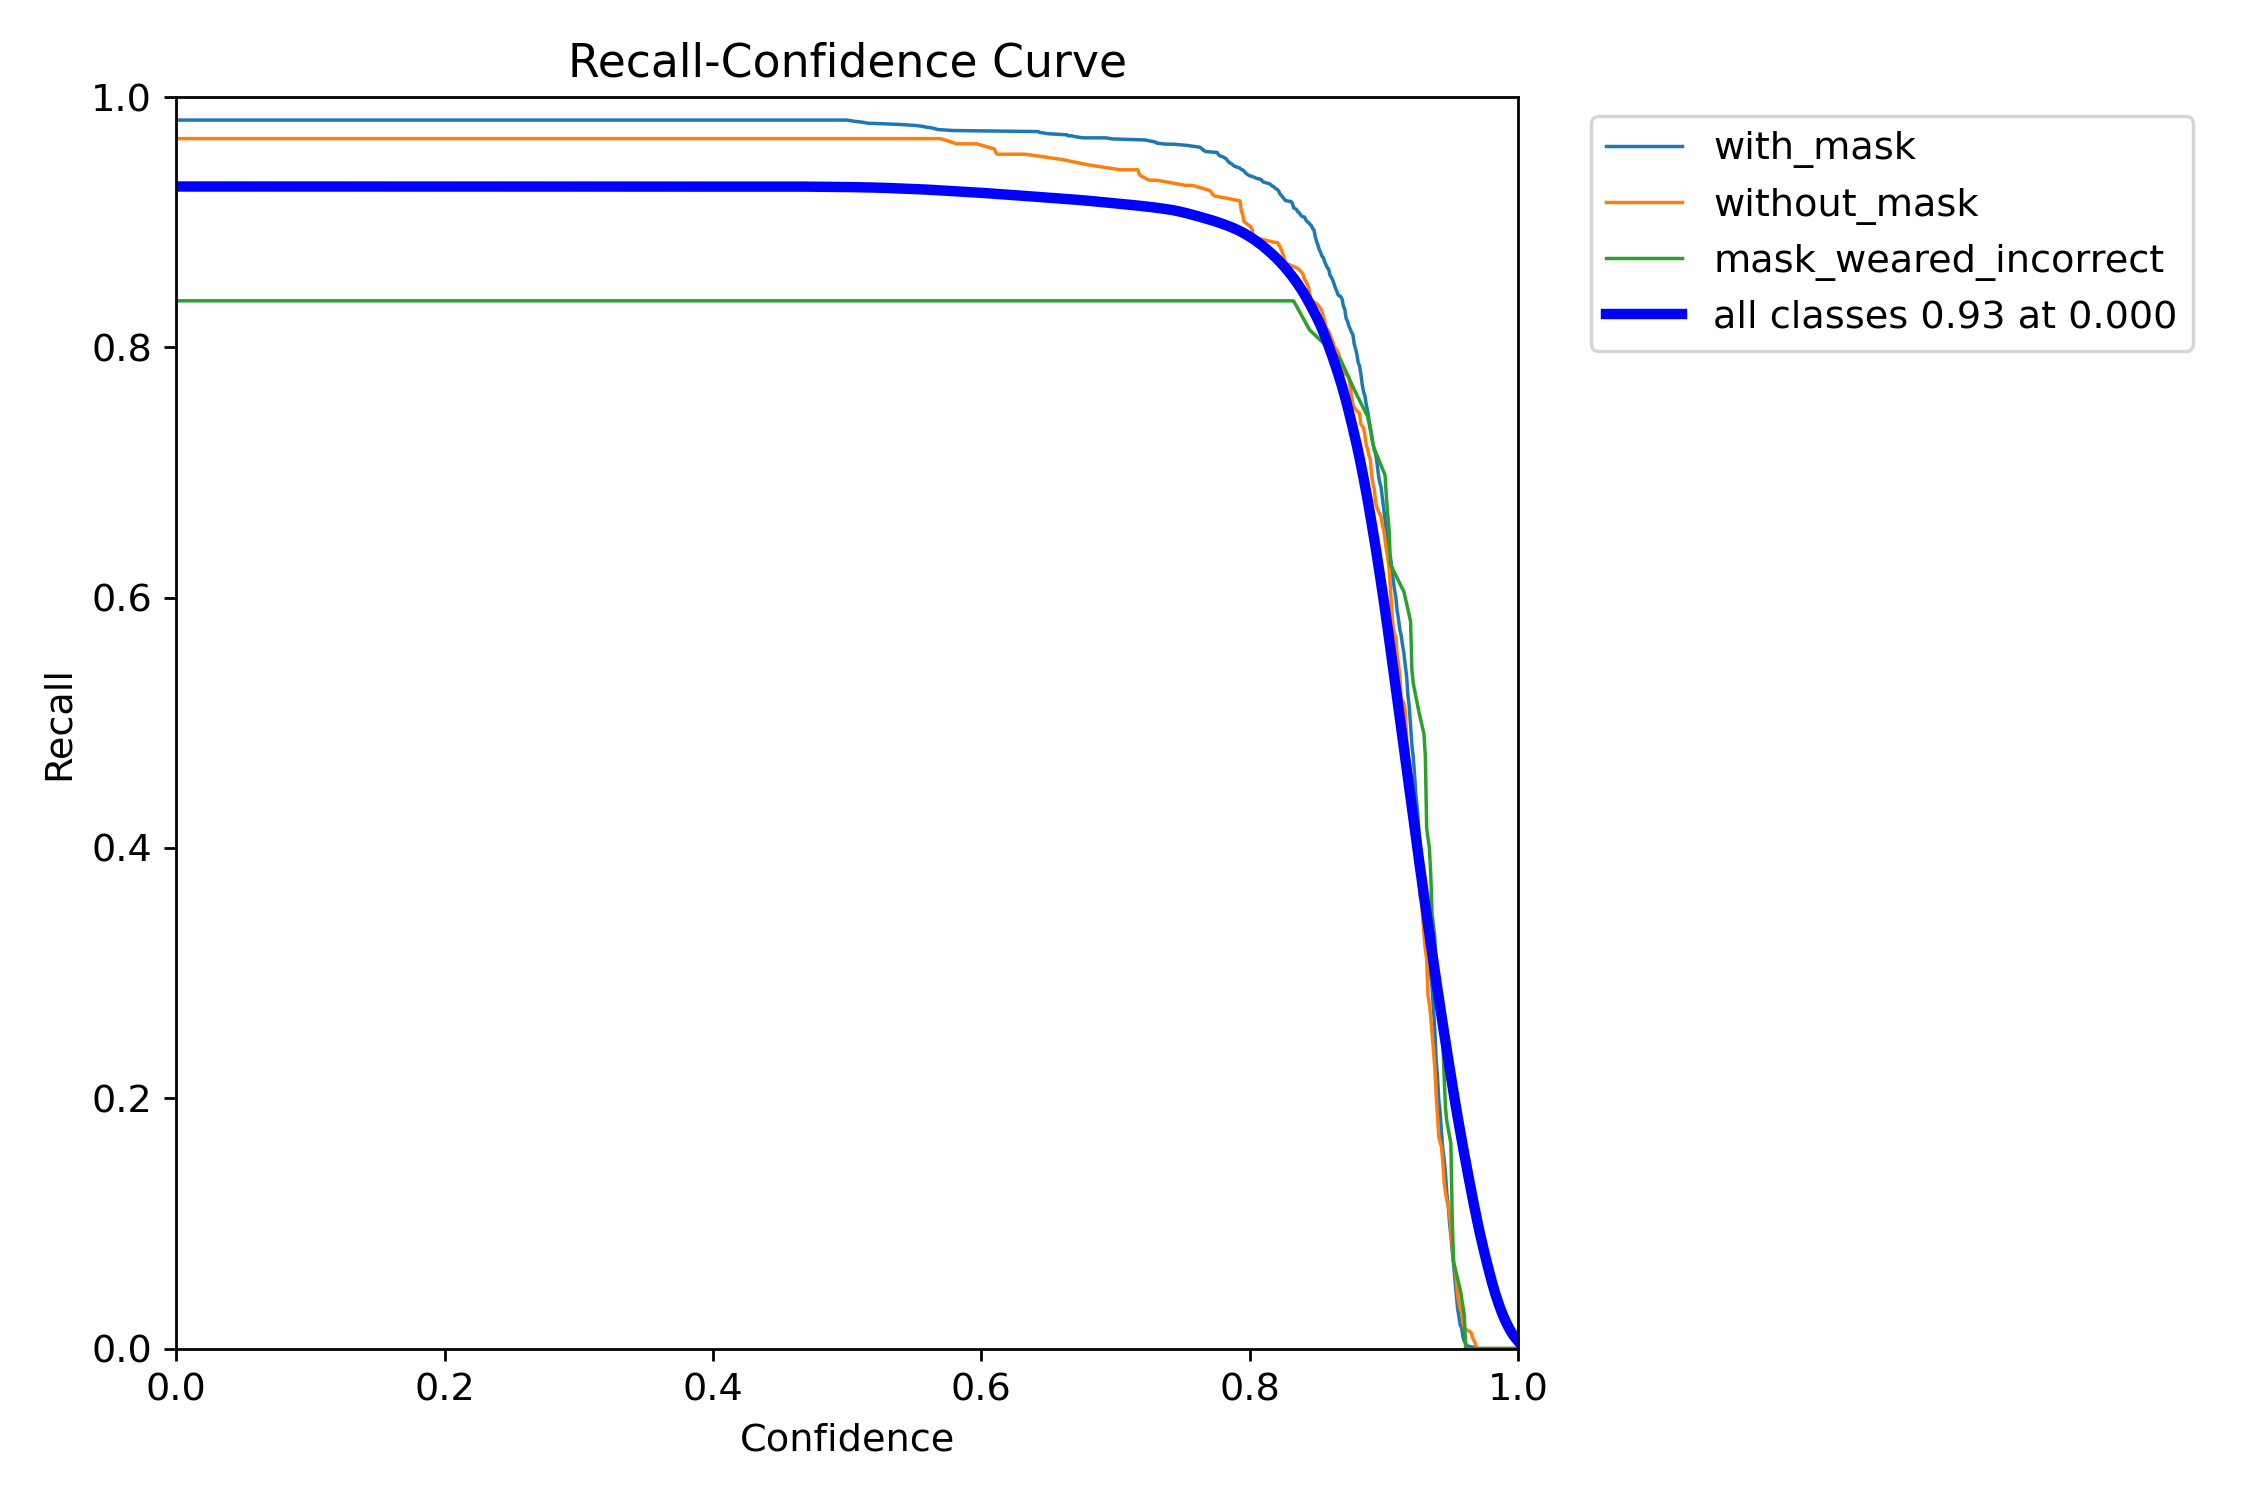

Showing: confusion_matrix.png


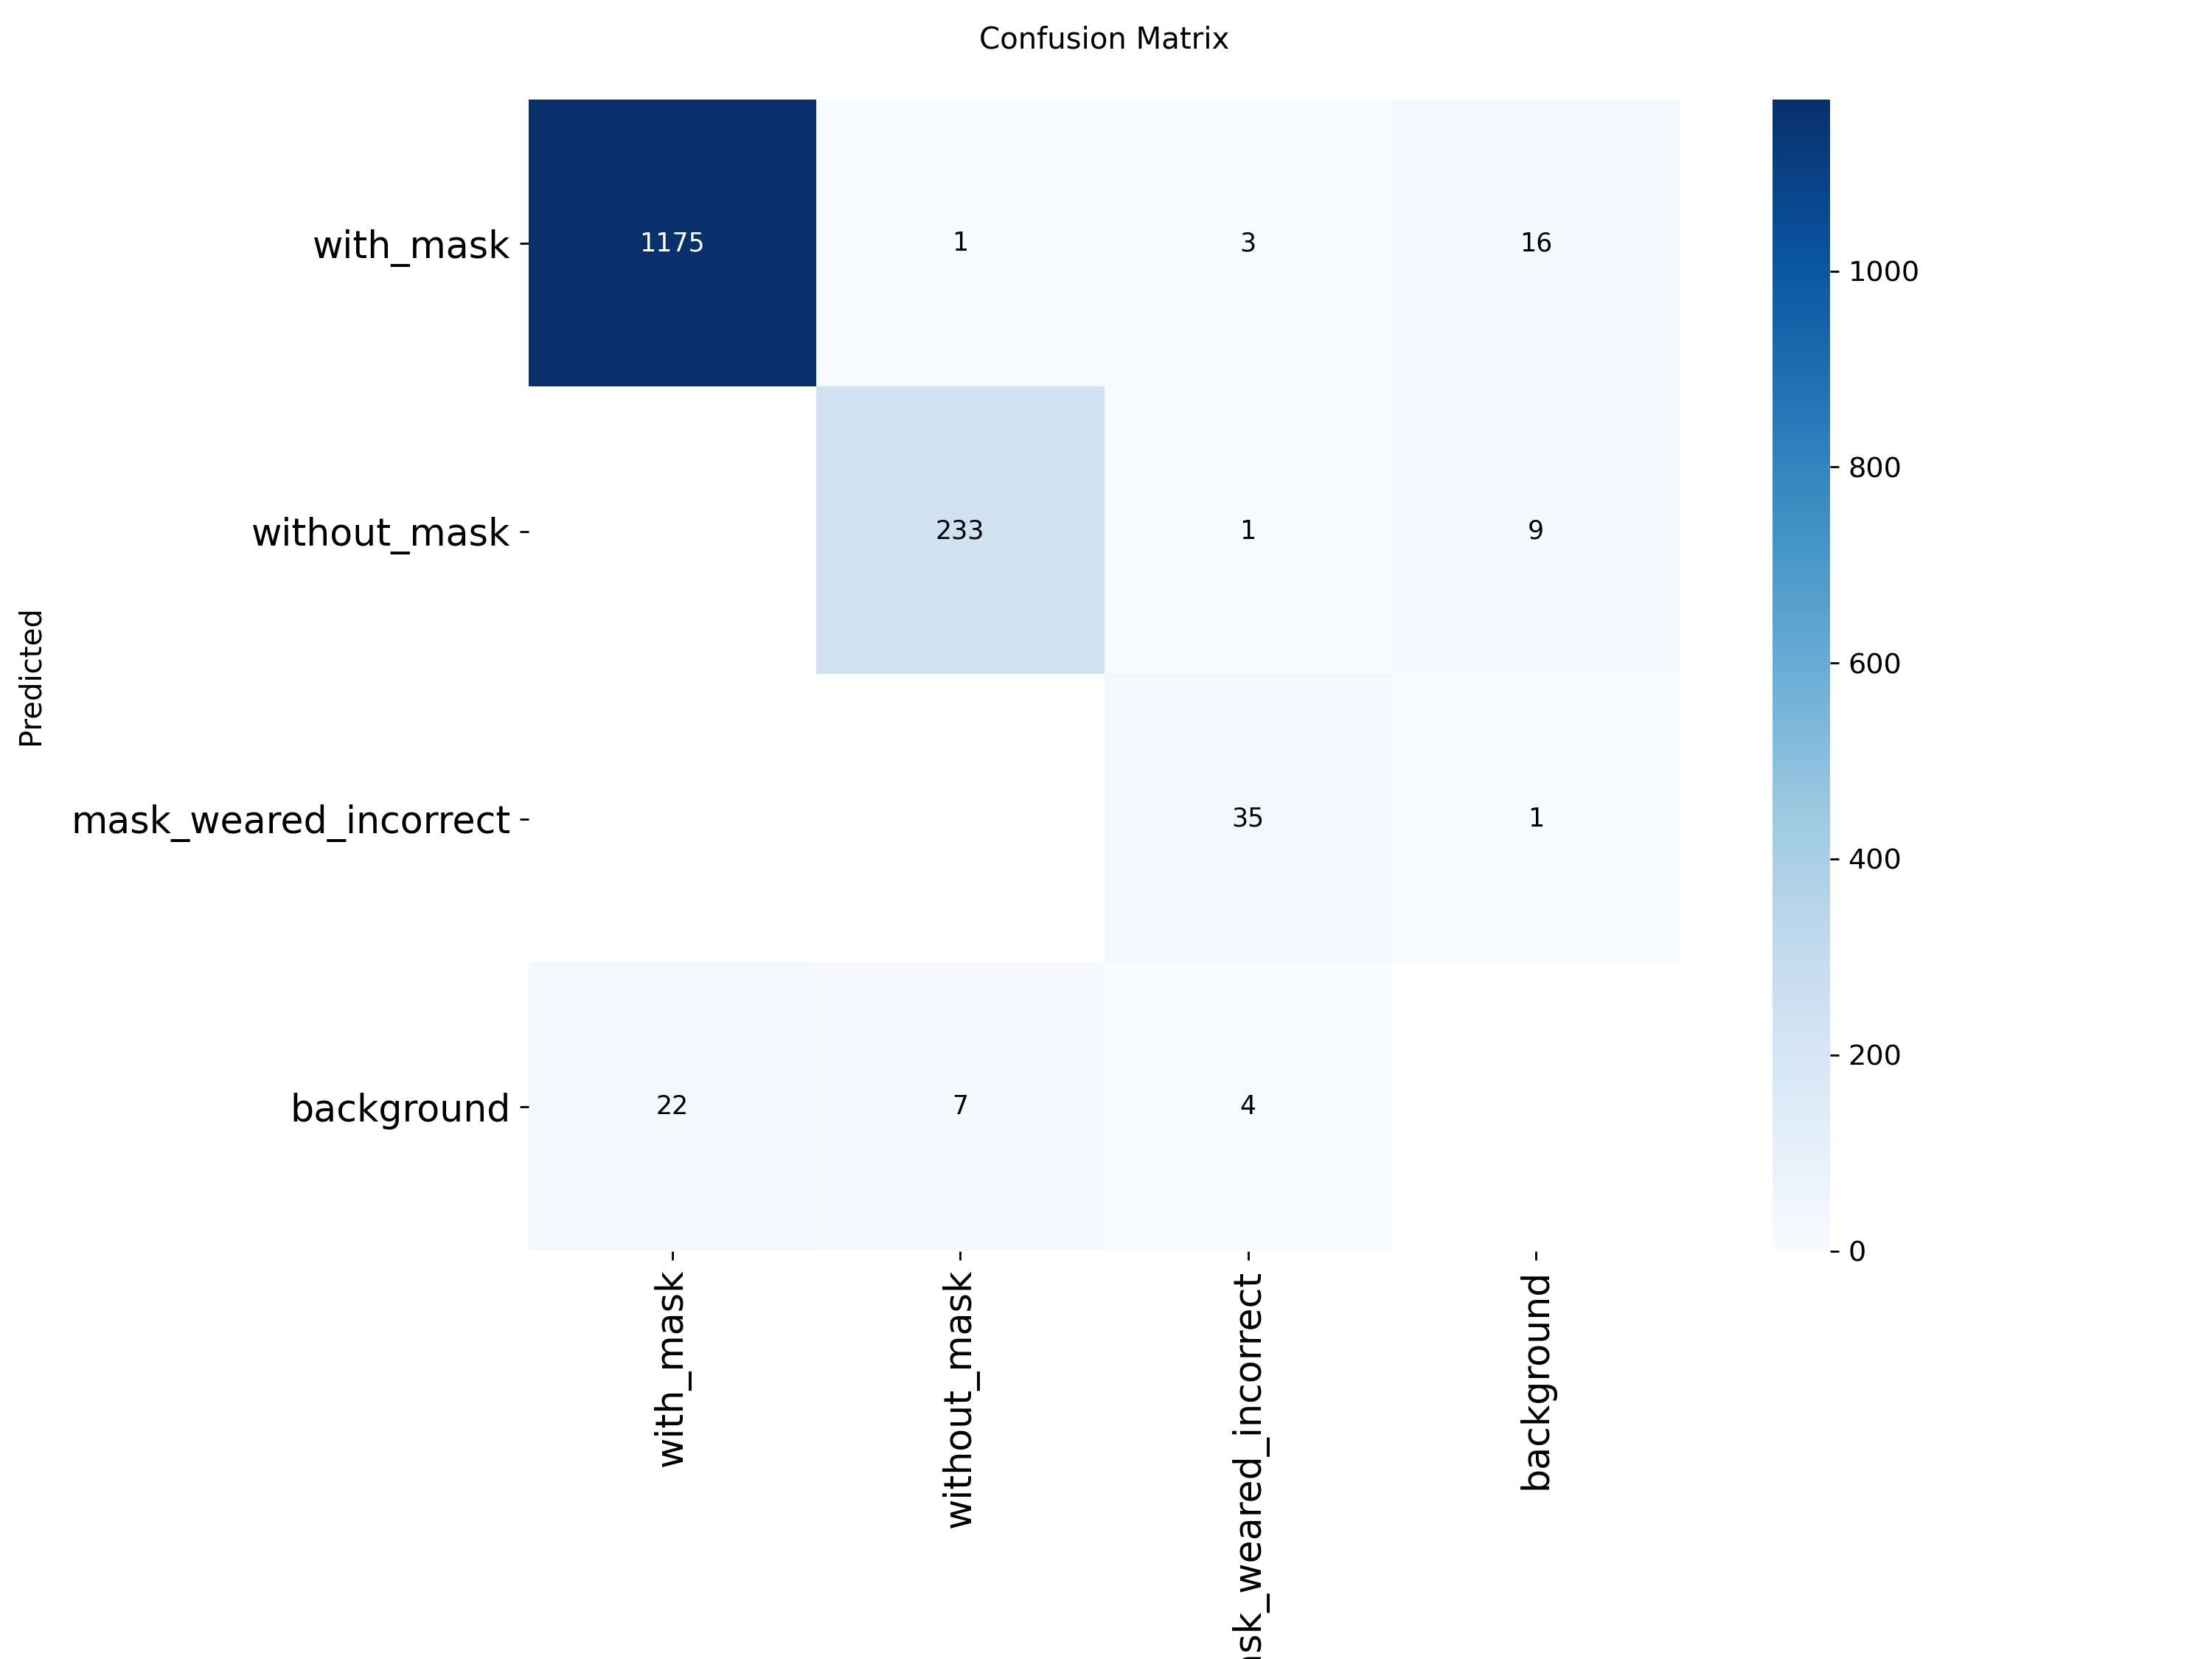

In [ ]:
VAL_RESULT_DIR = "/content/drive/MyDrive/Face_mask_project/results/val_check"

datas_to_show = [
    "BoxF1_curve.png",
    "BoxPR_curve.png",
    "BoxP_curve.png",
    "BoxR_curve.png",
    "confusion_matrix.png",
]

for img_name in datas_to_show:
    img_path = os.path.join(RESULT_DIR, img_name)
    if os.path.exists(img_path):
        print(f"Showing: {img_name}")
        display(Image(filename=img_path))
    else:
        print(f"Not found: {img_path}")


Showing: val_batch0_pred.jpg


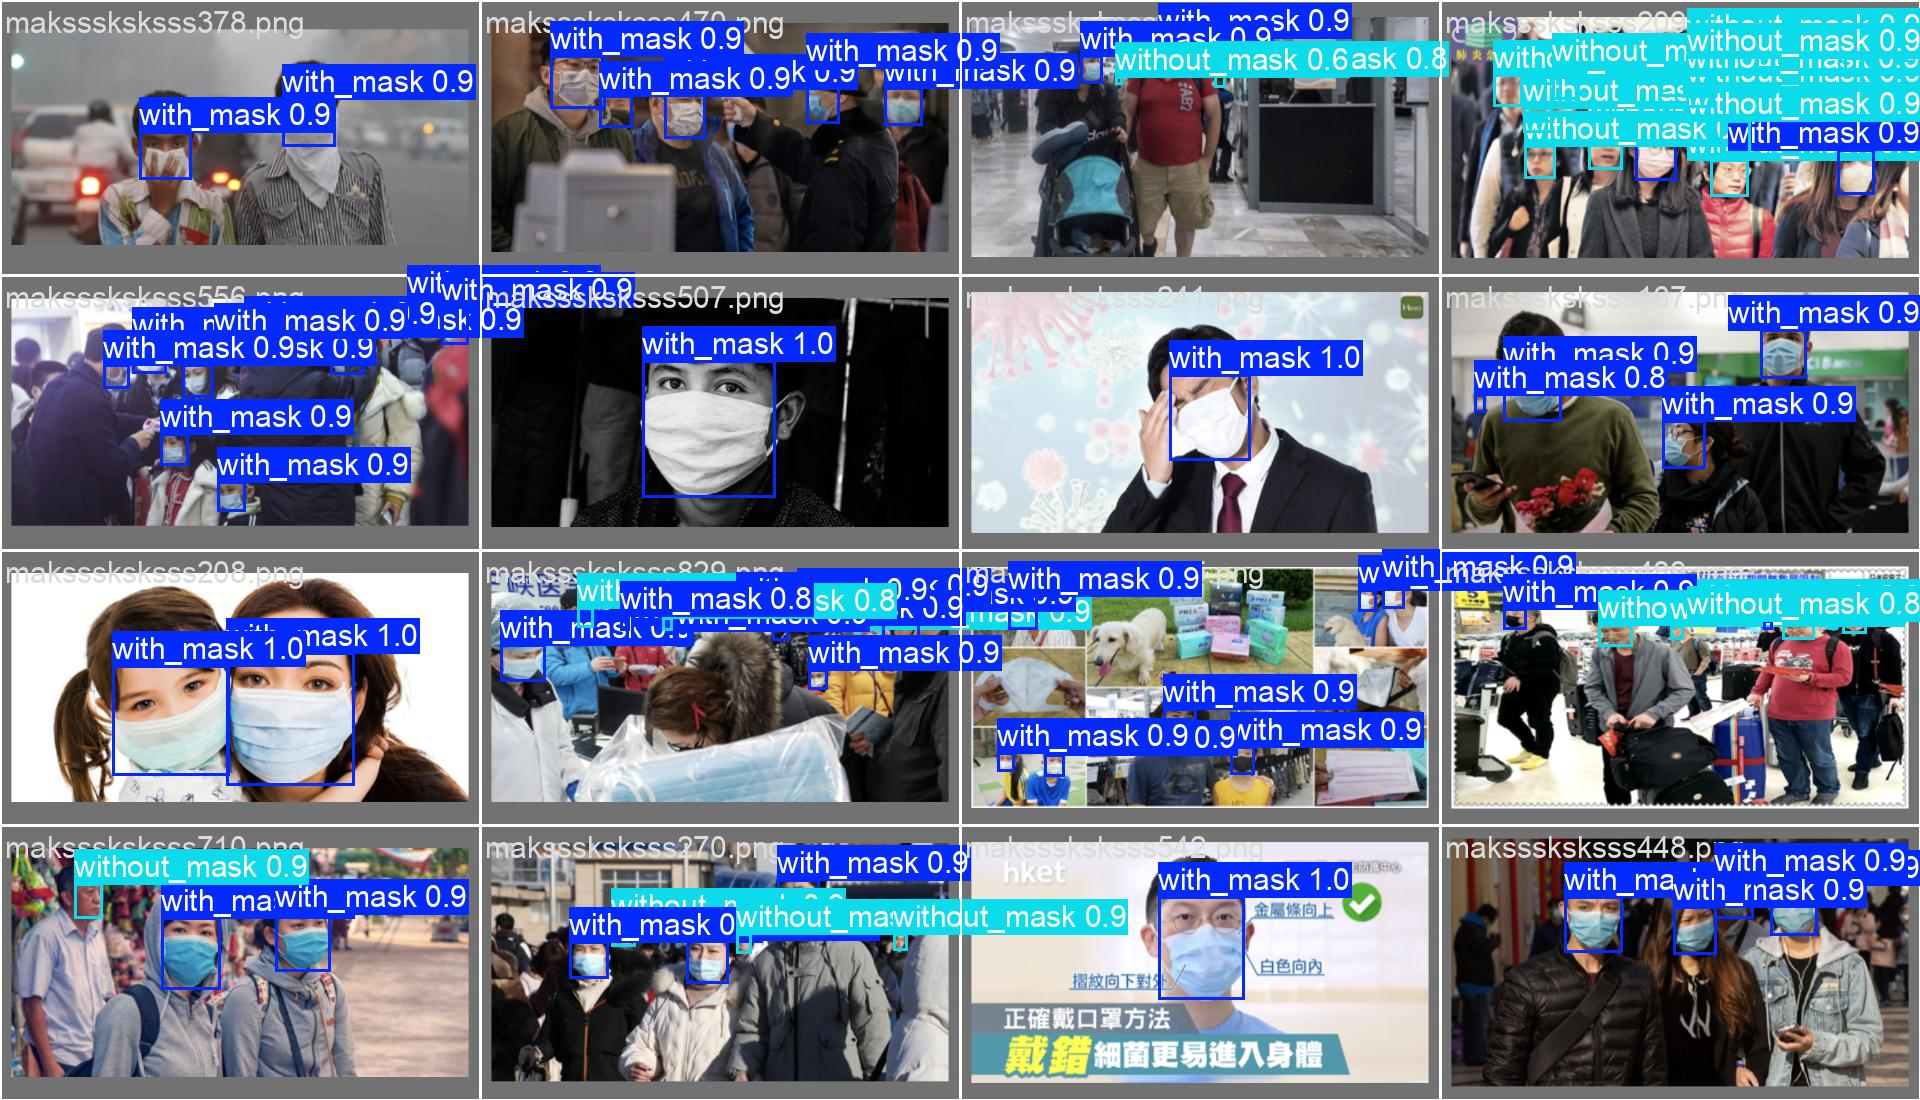

Showing: val_batch1_pred.jpg


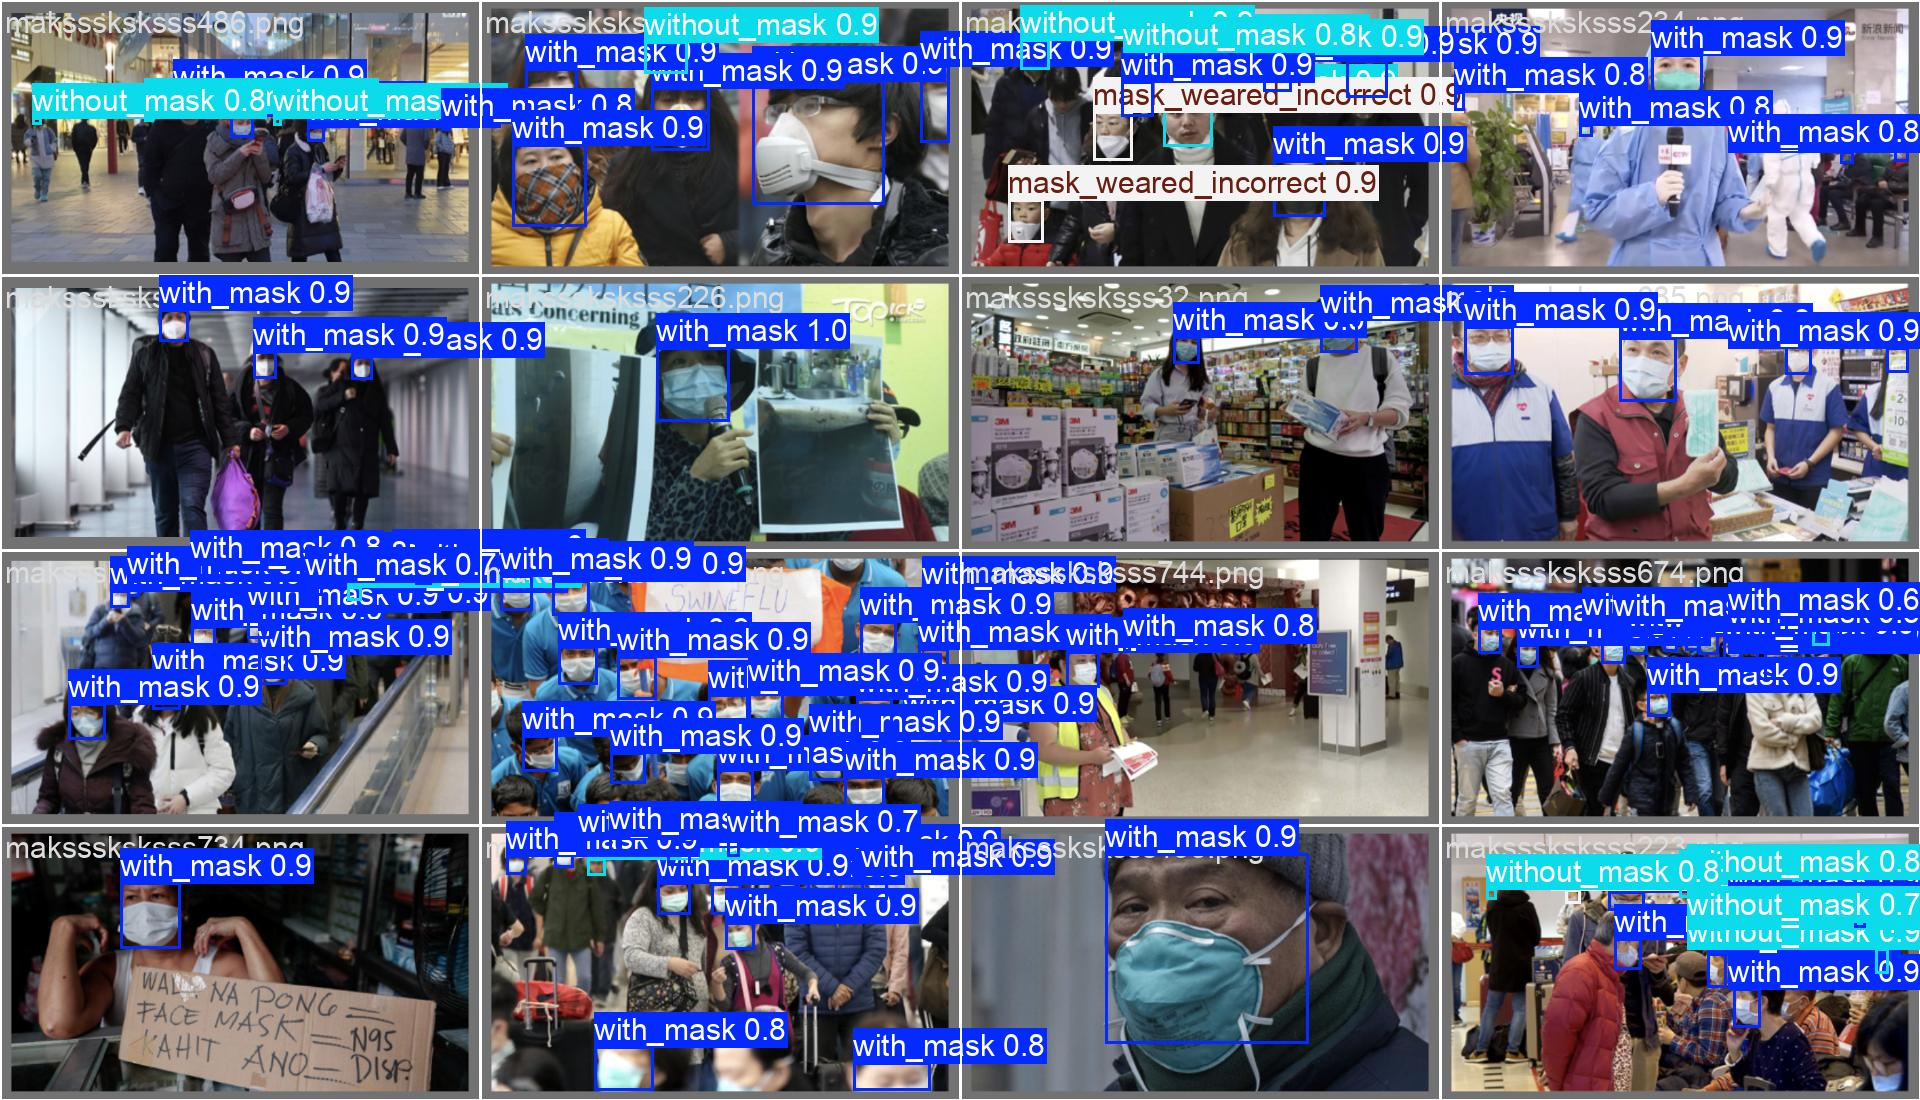

Showing: val_batch2_pred.jpg


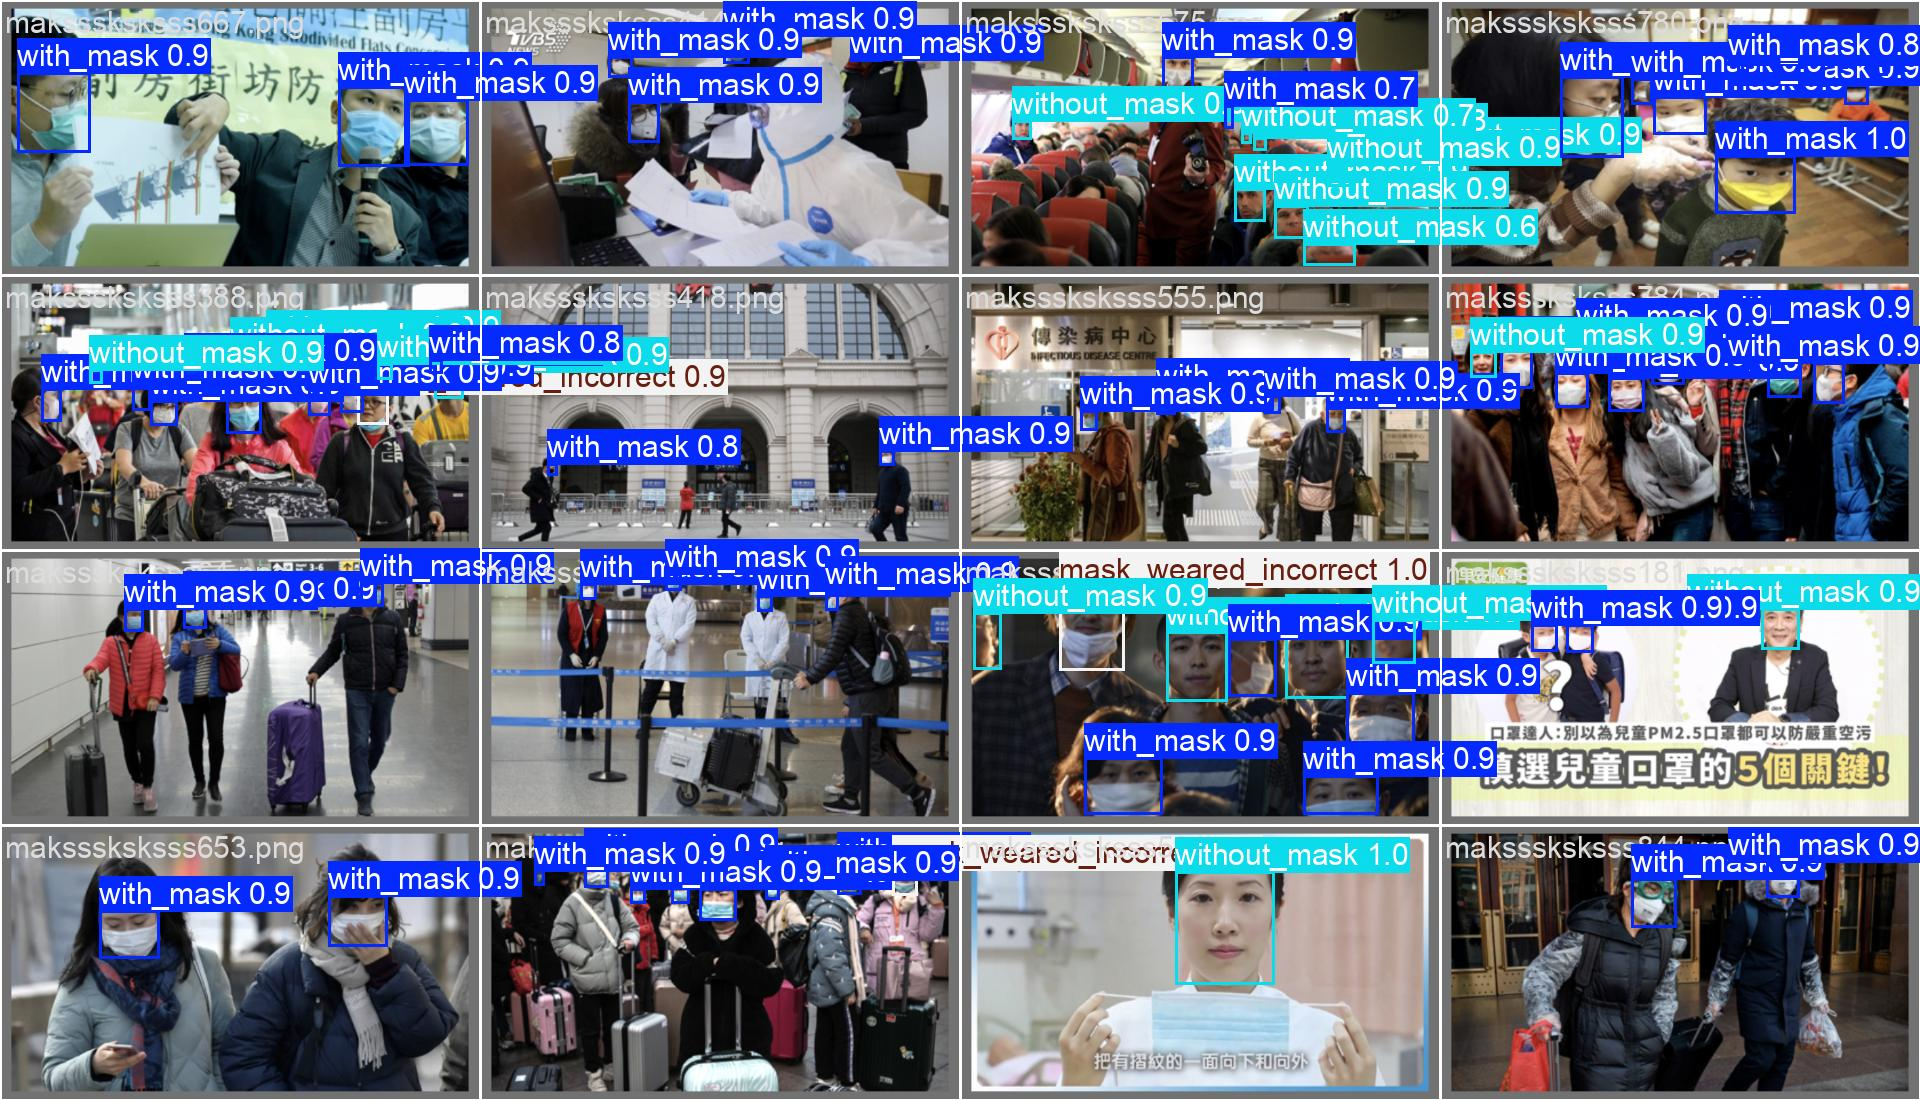

In [ ]:
images_to_show = [
    "val_batch0_pred.jpg",
    "val_batch1_pred.jpg",
    "val_batch2_pred.jpg"
]

for img_name in images_to_show:
    img_path = os.path.join(RESULT_DIR, img_name)
    if os.path.exists(img_path):
        print(f"Showing: {img_name}")
        display(Image(filename=img_path))
    else:
        print(f"Not found: {img_path}")

